# Load data

In [1]:
import pandas as pd

datafile = "https://bit.ly/nci60-custom"
df = pd.read_csv(datafile, sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gene         9994 non-null   object 
 1   786-0        9994 non-null   float64
 2   A498         9994 non-null   float64
 3   A549         9994 non-null   float64
 4   ACHN         9994 non-null   float64
 5   BT-549       9994 non-null   float64
 6   CAKI-1       9994 non-null   float64
 7   CCRF-CEM     9994 non-null   float64
 8   COLO205      9994 non-null   float64
 9   DU-145       9994 non-null   float64
 10  EKVX         9994 non-null   float64
 11  HCC-2998     9994 non-null   float64
 12  HCT-116      9994 non-null   float64
 13  HCT-15       9994 non-null   float64
 14  HL-60        9994 non-null   float64
 15  HOP-62       9994 non-null   float64
 16  HOP-92       9994 non-null   float64
 17  HS-578T      9994 non-null   float64
 18  HT29         9994 non-null   float64
 19  IGR-OV

# Process the data for clustering. 

Change the index from the numerical index (default when you load a pandas df) to the 
first column (gene names)

In [2]:
df = df.set_index('gene')
df.head()

,786-0,A498,A549,ACHN,BT-549,CAKI-1,CCRF-CEM,COLO205,DU-145,EKVX,...,SNB-19,SNB-75,SR,SW-620,T-47D,TK-10,U251,UACC-257,UACC-62,UO-31
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,-1.025477,-0.925477,0.274523,-0.875477,2.484523,1.244523,1.914523,-1.025477,0.584523,0.094523,...,0.494523,-0.705477,0.914523,-0.885477,1.524523,-0.995477,0.314523,1.774523,2.104523,-0.665477
A2M,-1.409323,-1.409323,-1.409323,-1.409323,-1.409323,-1.399323,-1.299323,-1.409323,-1.399323,0.100677,...,-0.889323,-0.729323,-1.409323,-1.229323,-1.399323,-1.399323,-1.369323,5.630677,3.280677,-1.399323
A2ML1,-1.696062,-1.686062,-1.686062,-1.686062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.586062,...,-1.696062,-1.696062,-1.696062,-1.696062,-1.636062,-1.696062,-1.696062,-1.686062,-1.586062,-1.696062
A4GALT,1.978677,1.588677,0.908677,0.348677,1.098677,1.488677,-1.791323,-1.041323,-0.601323,1.498677,...,0.008677,2.308677,-2.241323,-1.101323,0.668677,-0.181323,-0.131323,-2.241323,-1.581323,1.368677
AAAS,0.878385,0.178385,1.658385,-0.291615,-0.011615,0.568385,1.518385,0.148385,0.158385,1.038385,...,-0.041615,0.638385,0.608385,1.968385,1.218385,0.098385,0.238385,0.778385,0.558385,0.508385


Get a list of all genes by retrieving the column names:

In [13]:
cells = list(df.columns.values)
print(len(cells),"cells", "e.g.",cells[0])

genes = list(df.index.values)
print(len(genes),"genes", "e.g.",genes[0])


60 cells e.g. 786-0
9994 genes e.g. A1BG


Transpose the matrix:

In [15]:
df_t=df.transpose()
df_t.head()

gene,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AAED1,AAGAB,AAMP,...,ZSWIM7,ZSWIM8,ZUFSP,ZW10,ZWILCH,ZXDA,ZXDB,ZXDC,ZYG11B,ZZZ3
786-0,-1.025477,-1.409323,-1.696062,1.978677,0.878385,-0.354923,-0.809323,1.419631,0.369015,-0.128523,...,0.266154,0.002246,0.482123,0.605908,2.007554,-0.359754,-0.193538,-0.565677,-0.243108,0.456292
A498,-0.925477,-1.409323,-1.686062,1.588677,0.178385,-0.184923,-0.389323,1.779631,0.249015,-0.198523,...,0.106154,0.042246,0.092123,-0.384092,1.227554,0.770246,0.386462,-0.705677,-0.233108,-0.113708
A549,0.274523,-1.409323,-1.686062,0.908677,1.658385,-0.074923,0.880677,0.809631,0.649015,0.381477,...,0.366154,-0.627754,-0.047877,0.405908,2.227554,0.040246,0.616462,-0.775677,-0.243108,-0.433708
ACHN,-0.875477,-1.409323,-1.686062,0.348677,-0.291615,-0.014923,-0.809323,1.179631,-0.500985,-1.038523,...,0.266154,0.092246,0.192123,-0.854092,0.947554,-0.259754,-0.533538,-1.125677,-1.633108,-0.203708
BT-549,2.484523,-1.409323,-1.696062,1.098677,-0.011615,-2.114923,-0.809323,1.379631,-0.630985,-1.168523,...,0.306154,0.702246,0.752123,0.465908,0.887554,-0.199754,-0.083538,-0.785677,-0.773108,0.586292


In [16]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 786-0 to UO-31
Columns: 9994 entries, A1BG to ZZZ3
dtypes: float64(9994)
memory usage: 4.6+ MB


## Create a Dendrogram

 scipy’s clustering algorithm clusters the rows, not the columns. If we want to cluster the cell lines, we’ll need to 
transpose the data:

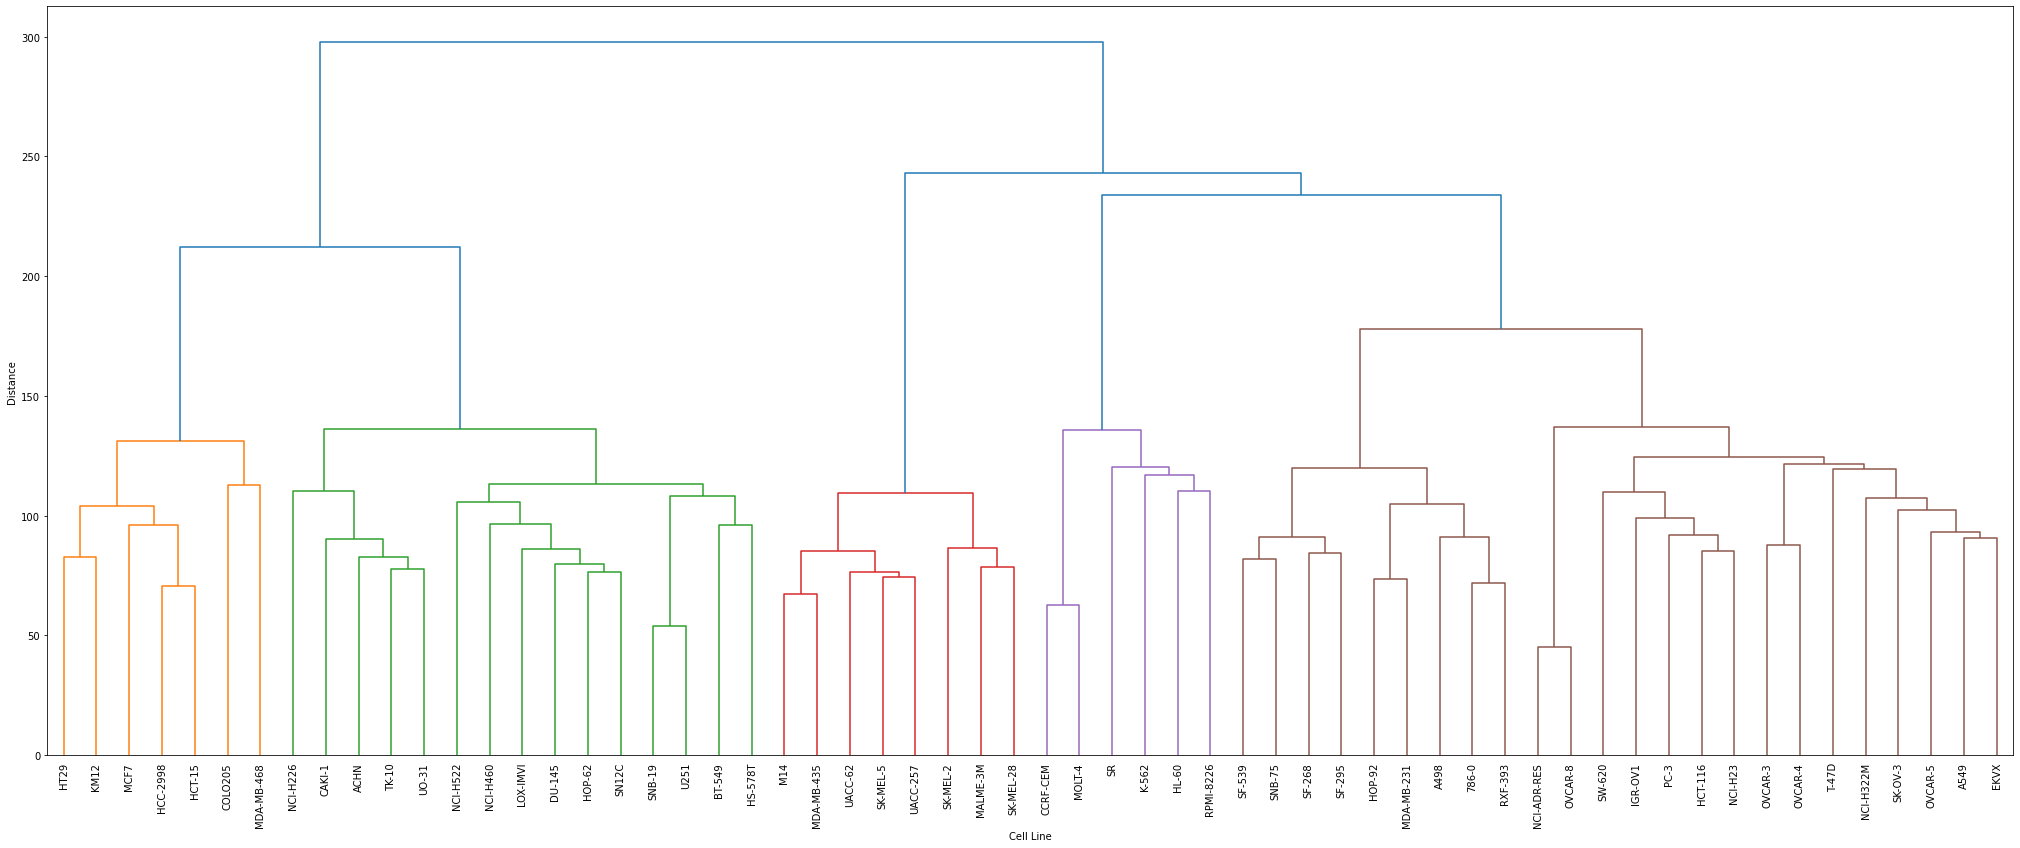

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(df_t.values, method='ward', metric='euclidean')

plt.figure(figsize=(30, 16))
ax = plt.subplot()
plt.subplots_adjust(left=0.07, bottom=0.3, right=0.98, top=0.95, wspace=0, hspace=0)
plt.xlabel('Cell Line')
plt.ylabel('Distance')

dendrogram(Z, leaf_rotation=90., leaf_font_size=10., labels=cells)
plt.savefig('dendrogram_nci60.png')
plt.show()



What does this tell us? Who knows!?
We can get a rough idea of which cell lines have similar global gene expression profiles. For instance, we see many of the 
ovarian cancer cell lines in the yellow cluster (OVCAR-3, OVCAR4, OVCAR8, SKO-OV-3) and some melanomas in the 
blue cluster (SK-MEL-28, MALME3M, SK-MEL-2, M14, MDA-MD-435). 
If we knew something about the mutational background, we could start looking for other rational explanations for the 
clusters. e.g., do any of the clusters share a driving mutation in RAS? BRAF? EGFR?

Go ahead and adjust the linkage method and/or distance metric to see how the dendrogram changes.

# K-means clustering of NCI-60 cancer gene expression data

Since we want to visualise the data, we will reduce the dimensionality using PCA:

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df.values)
data = pca.fit_transform(df.values)

Create a function for K-means analysis:

In [77]:
from sklearn.cluster import KMeans
k=7
kmeans = KMeans(n_clusters=k) # initialize
kmeans = kmeans.fit(df.values) # compute k-means clustering
labels = kmeans.predict(df.values) # get cluster labels for data points
centroids = kmeans.cluster_centers_ # get centroids
print(centroids)

[[ 8.84122576e-03  2.30387147e-02 -3.31709901e-02  1.06566313e-02
  -5.29809663e-02  5.32626713e-02 -1.29131007e-02 -2.29402469e-02
  -3.30386521e-02  1.80351236e-01 -5.60383128e-02  4.08466550e-02
  -3.25601994e-02 -6.20749602e-02 -4.66389235e-02 -2.37783874e-02
  -8.28554149e-02 -1.58223586e-01  3.52443476e-02  6.40397327e-02
  -2.70615849e-01 -1.12845235e-01 -4.72768604e-02  9.53257863e-02
  -2.64522931e-02 -1.83932500e-02 -3.41109290e-02  9.29776357e-02
   3.79521861e-02  6.80384223e-04 -4.87936572e-02  1.03547707e-01
   1.20531080e-01 -7.48235181e-02  6.76807236e-02  1.17348182e-01
   8.74282060e-03  4.78028817e-02  3.08282739e-03  1.51764819e-02
  -2.40260969e-02  5.33508966e-02 -2.47197411e-03  6.28554775e-02
  -2.87190050e-02  8.93671844e-02 -8.89545561e-03 -3.07922999e-02
   1.01477805e-01 -7.87800840e-02 -7.52951842e-02 -2.46097413e-02
   2.27333194e-02  1.37409261e-01  1.83208379e-01  3.51086163e-02
  -6.21088930e-02 -8.82758999e-03 -2.99575527e-02  7.07530474e-04]
 [-1.8794

In [80]:
centroids_t = list(map(list, zip(*centroids)))

centroids_data = pca.transform(centroids)

print(centroids_data)

[[ 0.08430194  1.07494722 -0.67207924]
 [ 0.17301072 -4.48396712 -0.46889159]
 [-1.94103537 -0.91627906  0.23483432]
 [ 8.18272528  0.58420128  0.40997381]
 [ 2.57761757 -0.55051179  0.33646908]
 [-5.54852052  0.96454079  0.40835473]
 [19.21265138  1.33353608  0.41695297]]


Call the K-means function and cluster the NCI-60 data into six groups.

Call the function a few times, and write all the results to a file. How do the cluster assignments change from run to run? 
How do they compare to the groups from the hierarchical clustering? How do they change if we don’t run a PCA?

Plot the data:

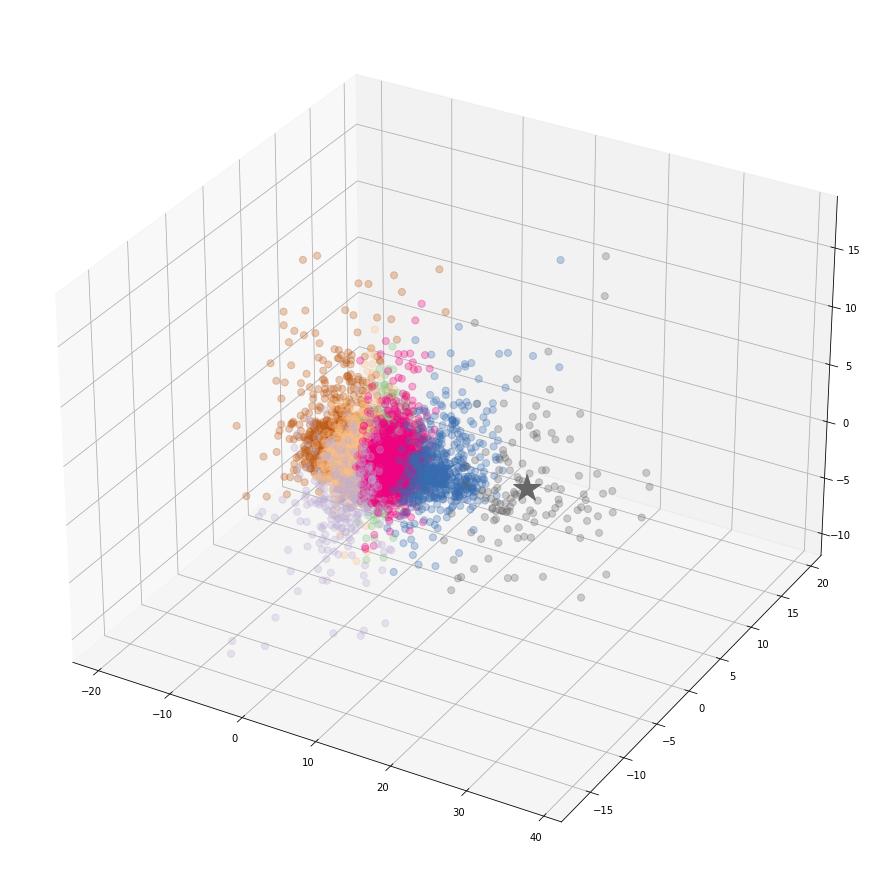

In [92]:
from mpl_toolkits.mplot3d import Axes3D

fig1 = plt.figure(figsize=(30, 16))
ax1 = plt.axes(projection='3d')

# plot the projected data with assigned clusters
ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, s=50, cmap='Accent', alpha=0.3)

# plot the centroids
ax1.scatter(centroids_data[:,0], centroids_data[:,1], centroids_data[:,2], c=range(k), s=800, marker='*', cmap='Accent')
plt.show()



Try changing the number of clusters. 

How many clusters should we have?
Does cluster assignment match tissue of origin?

# Cluster Evaluation